In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gensim
from wordcloud import WordCloud
import warnings
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report as cr

warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [4]:
dataset = pd.read_csv("IMDB_dataset_preprocessed.csv")
dataset.drop(dataset.tail(45000).index, inplace = True)
reviews = [w for w in dataset["review"]]
tokenized_words = [gensim.utils.simple_preprocess(w) for w in reviews]
#tokenized_words

In [6]:
# CBOW
CBOW = gensim.models.Word2Vec(tokenized_words, min_count = 1,
                              vector_size = 100, window = 5)

In [7]:
# Skip Gram
Skip_Gram = gensim.models.Word2Vec(tokenized_words, min_count = 1,
                                   vector_size = 100, window = 5, sg = 1)

In [8]:
# 10 most similar words to "movie" - CBOW
print(CBOW.wv.most_similar('movie'))

[('film', 0.953262984752655), ('review', 0.924589216709137), ('thing', 0.9188513159751892), ('flick', 0.9138855338096619), ('rating', 0.9136313796043396), ('comment', 0.9134317636489868), ('sequel', 0.9106666445732117), ('got', 0.9071416258811951), ('anthology', 0.9058238863945007), ('worth', 0.9055840373039246)]


In [9]:
# 10 most similar words to "movie" - Skip-Gram
print(Skip_Gram.wv.most_similar('movie'))

[('mistake', 0.8579109907150269), ('purely', 0.8576699495315552), ('amazed', 0.8572682738304138), ('personally', 0.8566331267356873), ('recommendation', 0.8559541702270508), ('film', 0.8543137907981873), ('honestly', 0.853327214717865), ('mst', 0.8522560596466064), ('alright', 0.8513338565826416), ('disagree', 0.8507727384567261)]


In [10]:
print("Similarity between the words 'film' " +
"and 'movie' - Word2vec CBOW : ",
CBOW.wv.similarity('film', 'movie'))

Similarity between the words 'film' and 'movie' - Word2vec CBOW :  0.953263


In [11]:
print("Similarity between the words 'film' " +
"and 'movie' - Word2vec Skip Gram : ",
Skip_Gram.wv.similarity('film', 'movie'))

Similarity between the words 'film' and 'movie' - Word2vec Skip Gram :  0.854314


In [12]:
# word vector for "word"
CBOW.wv["word"]

array([-0.32149813,  0.6730436 , -0.0952595 ,  0.3305653 , -0.11096162,
       -0.8161665 ,  0.7047117 ,  1.5585114 , -0.603114  , -0.622219  ,
       -0.09589836, -1.2515024 , -0.22620127,  0.6614327 ,  0.25625145,
       -0.52662617,  0.26857078, -0.64847475,  0.00819505, -1.3566473 ,
        0.625568  ,  0.32699186,  0.5502536 , -0.10545659,  0.2463927 ,
       -0.14966641, -0.66495585, -0.46239883, -0.9363318 ,  0.1468916 ,
        0.65841395,  0.15158571,  0.1971647 , -0.88699067, -0.02629106,
        0.6676348 ,  0.44273043, -0.5716291 , -0.11345545, -1.4091316 ,
       -0.02346383, -0.80606544, -0.7321966 ,  0.13695902,  0.46085045,
       -0.42329738, -0.5684452 ,  0.05752327,  0.39920345,  0.6927568 ,
        0.20132928, -0.78320134, -0.20789401, -0.05611743,  0.02550365,
        0.4533663 ,  0.50805825, -0.4184523 , -0.5165399 ,  0.43531144,
        0.35603833,  0.03096847, -0.07558431, -0.3776597 , -0.813981  ,
        0.8307717 ,  0.11774749,  1.0019668 , -0.90430593,  1.06

In [13]:
#vocab = list(CBOW.wv.key_to_index)
#X = CBOW.wv[vocab]

#tsne = TSNE(n_components = 2)
#X_tsne = tsne.fit_transform(X)

#df = pd.DataFrame(X_tsne, index = vocab, columns = ['x', 'y'])

#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)

#ax.scatter(df['x'], df['y'])

#for word, pos in df.iterrows():
#    ax.annotate(word, pos)

In [14]:
def display_closestwords_tsnescatterplot(model, modelName, word, size):
    
    arr = np.empty((0, size), dtype = 'f')
    word_labels = [word]

    close_words = model.similar_by_word(word)
    
    arr = np.append(arr, np.array([model[word]]), axis = 0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis = 0)
        
        tsne = TSNE(n_components = 2, random_state = 0)
        np.set_printoptions(suppress = True)
        Y = tsne.fit_transform(arr)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy = (x, y), xytext = (0, 0), textcoords = 'offset points')
    plt.xlim(x_coords.min() + 0.00005, x_coords.max() + 0.00005)
    plt.ylim(y_coords.min() + 0.00005, y_coords.max() + 0.00005)
    plt.title("Top 10 closest words to 'movie' - Word2vec " + modelName, pad = 20)
    plt.show()

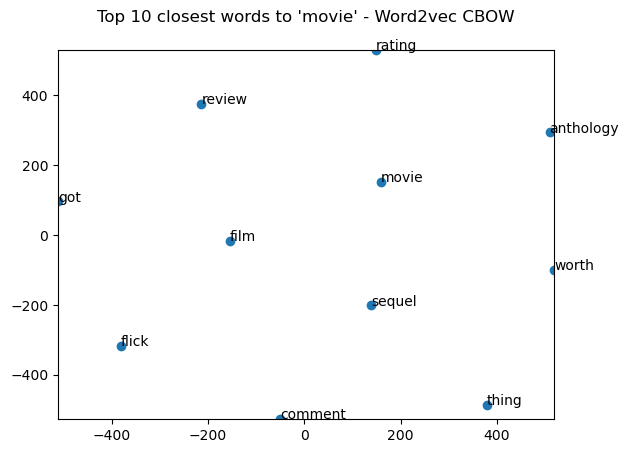

In [15]:
display_closestwords_tsnescatterplot(CBOW.wv, 'CBOW', 'movie', 100)

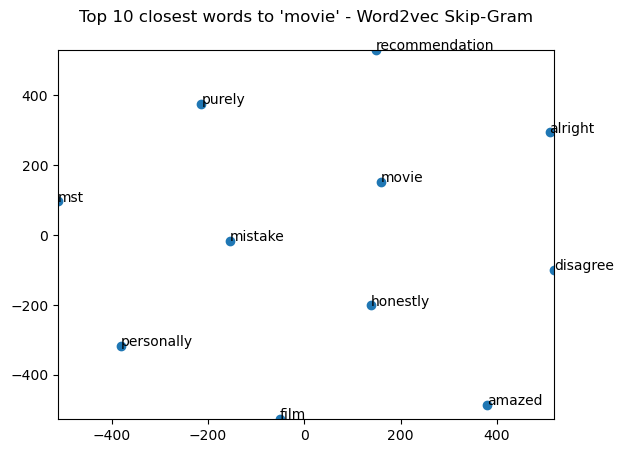

In [16]:
display_closestwords_tsnescatterplot(Skip_Gram.wv, 'Skip-Gram', 'movie', 100)

In [17]:
# CBOW
def getReviewVector(doc):
    return np.mean([CBOW.wv[word] for word in doc if word in CBOW.wv.index_to_key], axis = 0)

In [18]:
x = []
for i in range(len(tokenized_words)):
    x.append(getReviewVector(tokenized_words[i]))

In [19]:
y = pd.get_dummies(dataset["sentiment"])
y = y.iloc[:,1].values

array([1, 1, 1, ..., 1, 0, 0], dtype=uint8)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [21]:
CBOW_NB = GaussianNB().fit(X_train, y_train)

In [22]:
CBOW_NB_prediction = CBOW_NB.predict(X_test)

In [23]:
score = accuracy_score(y_test, CBOW_NB_prediction)
print(score)
print(cr(y_test, CBOW_NB_prediction))

0.584
              precision    recall  f1-score   support

           0       0.62      0.53      0.57       525
           1       0.55      0.65      0.60       475

    accuracy                           0.58      1000
   macro avg       0.59      0.59      0.58      1000
weighted avg       0.59      0.58      0.58      1000



In [24]:
# Skip-Gram
def getReviewVector(doc):
    return np.mean([Skip_Gram.wv[word] for word in doc if word in Skip_Gram.wv.index_to_key], axis = 0)

In [25]:
x = []
for i in range(len(tokenized_words)):
    x.append(getReviewVector(tokenized_words[i]))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [27]:
Skip_Gram_NB = GaussianNB().fit(X_train, y_train)

In [28]:
Skip_Gram_NB_prediction = Skip_Gram_NB.predict(X_test)

In [29]:
score = accuracy_score(y_test, Skip_Gram_NB_prediction)
print(score)
print(cr(y_test, Skip_Gram_NB_prediction))

0.715
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       525
           1       0.68      0.76      0.72       475

    accuracy                           0.71      1000
   macro avg       0.72      0.72      0.71      1000
weighted avg       0.72      0.71      0.71      1000

